# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#visuals">Analyzing and Visualizing Data</a></li>
</ul>

Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import io

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archived = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
image_df = pd.read_csv(io.StringIO(response.text), sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Using provided additional data(tweet_json.txt)

In [6]:
df_list = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        diction = json.loads(line)
        tweet_id = diction['id']
        rt_count = diction['retweet_count']
        fav_count = diction['favorite_count']
        df_list.append({'tweet_id': tweet_id, 
                       'retweet_count': rt_count,
                       'favorite_count': fav_count})
retweet_df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
retweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## ASSESSING DATA

#### Visual accessment

In [8]:
archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
retweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [11]:
list(archived['name'].value_counts().index)

['None',
 'a',
 'Charlie',
 'Cooper',
 'Lucy',
 'Oliver',
 'Tucker',
 'Penny',
 'Lola',
 'Winston',
 'Bo',
 'Sadie',
 'the',
 'Daisy',
 'Buddy',
 'Toby',
 'an',
 'Bailey',
 'Leo',
 'Oscar',
 'Stanley',
 'Rusty',
 'Bella',
 'Dave',
 'Jack',
 'Koda',
 'Scout',
 'Jax',
 'Milo',
 'Louis',
 'Phil',
 'Sammy',
 'Gus',
 'Chester',
 'Alfie',
 'Sunny',
 'Bentley',
 'very',
 'Oakley',
 'Finn',
 'George',
 'Larry',
 'Clarence',
 'Loki',
 'Walter',
 'Reggie',
 'Hank',
 'Scooter',
 'Duke',
 'quite',
 'Reginald',
 'Maggie',
 'Luna',
 'Maddie',
 'Dexter',
 'Jerry',
 'Carl',
 'Ruby',
 'Riley',
 'Clark',
 'Chip',
 'Brody',
 'just',
 'Sophie',
 'Sampson',
 'Boomer',
 'Winnie',
 'Gary',
 'Archie',
 'Jeffrey',
 'Gerald',
 'one',
 'Cassie',
 'Maximus',
 'Moose',
 'Bear',
 'Bruce',
 'Beau',
 'Derek',
 'Shadow',
 'Rory',
 'Waffles',
 'Earl',
 'Nala',
 'Louie',
 'Colby',
 'Otis',
 'Doug',
 'Rosie',
 'Wyatt',
 'Lily',
 'Coco',
 'Kyle',
 'Olive',
 'Peaches',
 'Vincent',
 'Reese',
 'Jimothy',
 'Frankie',
 'Ted',


#### Programmatic accessment

In [12]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
archived.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
archived.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
text = archived.text[5]
text

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [19]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Quality issues

1. Erroneous datatype : 'tweet_id' in all three tables and 'timestamp' in archived table
##### `archived` table
2. Retweets are presents: Only original ratings (no retweets) that have images should be considered
3. Missing information (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
4. The column 'source' has unnecessary html tags.
5. The column 'name' has inaccurate values starting with lowercase letters : a, an, all, the, mad, not by etc, instead of 'None'
6. The column 'expanded_urls' has null values
7. urls links at the end of the column 'text'

##### `image_df` table
8. Drop unnecessary columns and give p1 a better names.

### Tidiness issues
9. Redundant columns of the same category, ['doggo', 'flooter', 'pupper', 'puppo'] columns, but we only need one 'stage' column
10. "retweet count" and "favorite count" columns are not in the archived


<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make a copy of three dataframes
archived_clean = archived.copy()
image_df_clean = image_df.copy()
retweet_df_clean = retweet_df.copy()

### Archived Table

#### Issue #1: Erroneous datatype : 'tweet_id' in all three tables and 'timestamp' in archived table
#### Define: 
- Convert timestamp to pandas datetime
- Convert tweet_id datatype from int to string
#### Code

In [21]:
# Converting timestamp datatype to datetime
archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])

# Converting tweet_id datatype to int
archived_clean['tweet_id'] = archived_clean['tweet_id'].astype(str)
# Converting tweet_id datatype to int
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype(str)
# Converting tweet_id datatype to int
retweet_df_clean['tweet_id'] = retweet_df_clean['tweet_id'].astype(str)

#### Test

In [22]:
# Checking data type of timestamp
print('timestamp datatype: ', archived_clean['timestamp'].dtype)

# Checking datatype of tweet_id
print('tweet_id datatype: ', archived_clean['tweet_id'].dtype)

# Checking datatype of tweet_id
print('tweet_id datatype: ', image_df_clean['tweet_id'].dtype)

# Checking datatype of tweet_id
print('tweet_id datatype: ', retweet_df_clean['tweet_id'].dtype)

timestamp datatype:  datetime64[ns, UTC]
tweet_id datatype:  object
tweet_id datatype:  object
tweet_id datatype:  object


#### Issue #2: Only original ratings (no retweets) that have images should be considered
#### Define: Drop observations  reply and retweet, by deleting the rows with values present in in_reply_to_status_id and retweeted_status_id
#### Code

In [23]:
# Getting the index of the observations of 'reply'
index_reply = archived_clean[archived_clean['in_reply_to_status_id'].isnull() == False].index

In [24]:
# Getting the index of the observations of 'retweet'
index_retweet = archived_clean[archived_clean['retweeted_status_id'].isnull() == False].index

In [25]:
index_total = set(index_reply.append(index_retweet))

In [26]:
# Drop the rows from the DataFrame
archived_clean.drop(index_total, inplace=True)
# Reset index after drop
archived_clean.reset_index(drop=True, inplace=True)

#### Test

In [27]:
# Check for reply
assert archived_clean['in_reply_to_status_id'].isnull().all() == True

In [28]:
# Check for retweet
assert archived_clean['retweeted_status_id'].isnull().all() == True

#### Issue #3: Missing information (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)
#### Define: Drop the columns 
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
#### Code

In [29]:
# Drop columns 
archived_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
           'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace=True)

#### Test

In [30]:
archived_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Issue #4: The column 'source' has unnecessary html tags
#### Define:  Use BeautifulSoup to get the texts from the tag
#### Code

In [31]:
# Using Bautiful soup to extract the text 
from bs4 import BeautifulSoup as bs4

source_list = []
for id, df in archived_clean.iterrows():
    soup = bs4(df['source'], 'lxml')
    x = soup.find('a').contents[0]
    source_list.append(x)
    
archived_clean['source'] = source_list

#### Test

In [32]:
pd.Series(source_list).value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
dtype: int64

In [33]:
archived_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1922,669037058363662336,2015-11-24 06:17:19+00:00,Twitter for iPhone,Here we have Pancho and Peaches. Pancho is a C...,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
1892,669926384437997569,2015-11-26 17:11:11+00:00,Twitter for iPhone,I've never seen a dog so genuinely happy about...,https://twitter.com/dog_rates/status/669926384...,12,10,None,None,None,None,None
1730,672970152493887488,2015-12-05 02:46:02+00:00,Twitter for iPhone,This is Chet. He's having a hard time. Really ...,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,None,None,pupper,None
60,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,None,None,None
697,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None


#### Issue #5:  The column 'name' has inaccurate values starting with lowercase letters : a, an, all, the, mad, not by etc. instead of 'None'
#### Define: Replacing names starting with lowercase letters with 'None'
#### Code

In [34]:
archived_clean['name'] = archived_clean['name'].apply(lambda x : 'None' if x[0].islower() else x)

#### Test

In [35]:
# Checking if all the first letters in the name columns is Upper case
assert archived_clean['name'].map(lambda x : x[0].isupper()).all()

#### Issue #6: The column 'expanded_urls' has null values
#### Define: Drop null values in expanded_urls
#### Code

In [36]:
archived_clean = archived_clean[archived_clean['expanded_urls'].notna()].reset_index(drop=True)

#### Test

In [37]:
# Checking for null values
archived_clean['expanded_urls'].isnull().sum()

0

#### Issue #7:  urls links at the end of the column 'text'
#### Define:  
- View a sample from the text column
- Write a function to remove the url at the end of a text
- Apply function on the column 'text' 
#### Code

In [38]:
# Viewing a sample from the text column 
archived_clean['text'][33]

'Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf'

In [39]:
# Creating a function to remove the url at the end of a text
def remove_url(text):
    if 'https' in text.split()[-1]:
        url_len = len(text.split()[-1])
        text = text[:- url_len]
    else:
        text
    return text

In [40]:
# Applying the function on the 'text' column
archived_clean['text'] = archived_clean['text'].apply(lambda x: remove_url(x))

#### Test

In [41]:
# Viewing same samples
# Viewing a sample from the text column 
archived_clean['text'][33]

'Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 '

### Image_df Table

#### Issue #8: Drop unnecessary columns and give p1 a better names
#### Define:  
- Drop p2, p2_conf, p2_dog, p3, p3_conf, p3_dog
- Rename p1, p1_conf, p1_dog
#### Code

In [42]:
# Dropping unnecessary columns by selecting columns we want
image_df_clean = image_df_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog']]

In [43]:
# Renaming columns
image_df_clean = image_df_clean.rename(columns={'p1':'breed', 'p1_conf':'confidence', 'p1_dog':'result'})

#### Test

In [44]:
image_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed', 'confidence', 'result'], dtype='object')

#### Issue #9: Redundant columns of the same category, ['doggo', 'flooter', 'pupper', 'puppo'] columns, but we only need one 'stage' column
#### Define:  
- Create new column 'stage'
- Catergorise it based on doggo, flooter, pupper, puppo
- Drop ['doggo', 'flooter', 'pupper', 'puppo'] columns
#### Code

In [45]:
archived_clean['stage'] = archived_clean['doggo'] + archived_clean['floofer'] + archived_clean['pupper'] + archived_clean['puppo']

In [46]:
archived_clean['stage'].value_counts()

NoneNoneNoneNone        1759
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [47]:
archived_clean['stage'] = archived_clean['stage'].apply(lambda x: x.replace("None","") 
                                                        if x != 'NoneNoneNoneNone' else np.nan)

In [48]:
archived_clean['stage'].value_counts()

pupper          220
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [49]:
# Seperating value 
archived_clean.loc[archived_clean['stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'
archived_clean.loc[archived_clean['stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
archived_clean.loc[archived_clean['stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [50]:
archived_clean['stage'].value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [51]:
# Dropping unnecessary columns
archived_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [52]:
archived_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
794,747648653817413632,2016-06-28 04:31:44+00:00,Vine - Make a Scene,This is Keurig. He apparently headbutts other ...,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,NaN
699,758405701903519748,2016-07-27 20:56:24+00:00,Twitter for iPhone,This is Odie. He falls asleep wherever he want...,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,NaN
934,725729321944506368,2016-04-28 16:52:08+00:00,Twitter for iPhone,This is Lola. She's a Butternut Splishnsplash....,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,NaN
1560,676949632774234114,2015-12-16 02:19:04+00:00,Twitter for iPhone,This is Tyrus. He's a Speckled Centennial Tico...,https://twitter.com/dog_rates/status/676949632...,8,10,Tyrus,NaN
346,819238181065359361,2017-01-11 17:42:57+00:00,Twitter Web Client,Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,pupper


#### Issue #10: "retweet count" and "favorite count" columns are not in the archived
#### Define:  Merge retweet_df_clean with archived_df_clean
#### Code

In [53]:
merged_df1 = pd.merge(archived_clean, retweet_df_clean, on=['tweet_id'])

#### Test

In [54]:
merged_df1.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1004,714251586676113411,2016-03-28 00:43:43+00:00,Twitter for iPhone,This is Thumas. He hates potted plants. 8/10 w...,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,NaN,940,3570
2063,666418789513326592,2015-11-17 00:53:15+00:00,Twitter for iPhone,This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,NaN,48,129
695,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,4376,12376
569,780192070812196864,2016-09-25 23:47:39+00:00,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/780192070...,11,10,None,NaN,2589,9712
1531,678278586130948096,2015-12-19 18:19:51+00:00,Twitter for iPhone,Another spooky pupper here. Most definitely fl...,https://twitter.com/dog_rates/status/678278586...,10,10,None,pupper,6857,12531


In [55]:
final_df = pd.merge(merged_df1, image_df_clean, on=['tweet_id'])

In [56]:
final_df.shape

(1971, 16)

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
# Saving final_df as csv
final_df.to_csv('twitter_archive_master.csv', index=False)

<a id='visuals'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##### Limitations :
- The analysis and visualizations done in this section are based upon the wrangled data

#### For the purpose of analysis and visualization, I would create a column named "dog_rating" which is equal rating_numerator / rating_denominator and drop the rating numerator and denominator columns

In [58]:
# Creating new column named rating 
final_df['dog_rating'] = final_df['rating_numerator'] / final_df['rating_denominator']
df = final_df.drop(['rating_numerator', 'rating_denominator'], axis=1)

In [59]:
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence,result,dog_rating
879,724004602748780546,2016-04-23 22:38:43+00:00,Twitter for iPhone,This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,Luther,pupper,1790,4561,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,1.1
1189,690735892932222976,2016-01-23 03:20:44+00:00,Twitter for iPhone,Say hello to Peaches. She's a Dingleberry Zand...,https://twitter.com/dog_rates/status/690735892...,Peaches,NaN,1442,4134,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,1.3
57,879492040517615616,2017-06-27 00:10:17+00:00,Twitter for iPhone,This is Bailey. He thinks you should measure e...,https://twitter.com/dog_rates/status/879492040...,Bailey,NaN,3323,23822,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,1.2
584,771770456517009408,2016-09-02 18:03:10+00:00,Twitter for iPhone,This is Davey. He'll have your daughter home b...,https://twitter.com/dog_rates/status/771770456...,Davey,NaN,3924,13356,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,1.1
505,785872687017132033,2016-10-11 16:00:24+00:00,Twitter for iPhone,Meet Rusty. He appears to be rather h*ckin flu...,https://twitter.com/dog_rates/status/785872687...,Rusty,NaN,2130,7489,https://pbs.twimg.com/ext_tw_video_thumb/78587...,1,Great_Pyrenees,0.392108,True,1.2


#### Import package for Visualization

In [60]:
# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale = 1.3)

#### Checking summary statistics

In [61]:
df.describe()

,retweet_count,favorite_count,img_num,confidence,dog_rating
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,2784.449518,8949.106545,1.201928,0.594558,1.169499
std,4697.662893,12267.799790,0.559020,0.272126,4.090634
min,16.000000,81.000000,1.000000,0.044333,0.000000
25%,628.500000,1997.000000,1.000000,0.363091,1.000000
50%,1367.000000,4147.000000,1.000000,0.587764,1.100000
75%,3239.000000,11402.500000,1.000000,0.847827,1.200000
max,79515.000000,132810.000000,4.000000,1.000000,177.600000


#### 1.  Distributions among numeric columns.

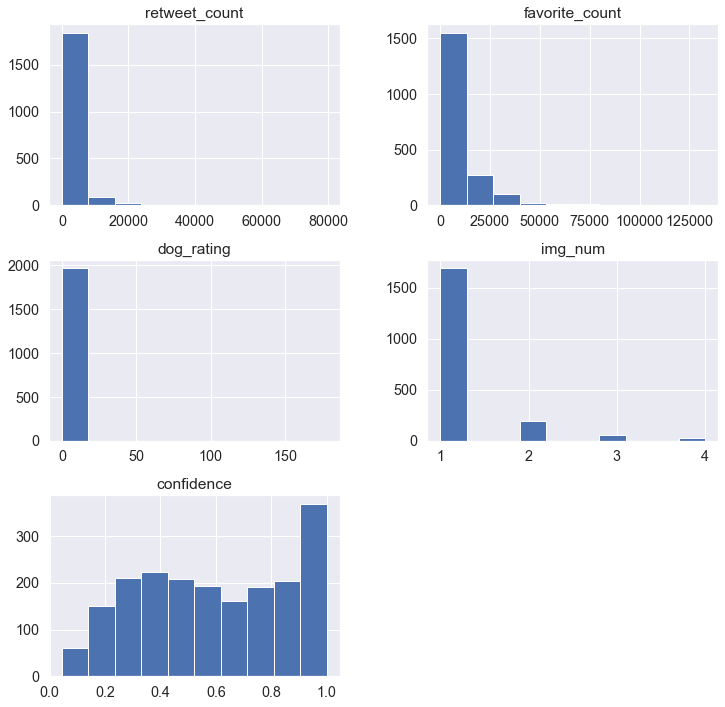

In [62]:
df_num = df[['retweet_count', 'favorite_count', 'dog_rating', 'img_num', 'confidence']]
df_num.hist(figsize = (12,12));

**Insight:**
 - The distributions are skewed
 - Majority of the favorite count are between the range of  81 to 20,000
 - Majority of the retweet count are between the range of 16 to 10,000

#### 2. Correlations between numerical columns

In [63]:
df.corr()

,retweet_count,favorite_count,img_num,confidence,result,dog_rating
retweet_count,1.000000,0.913014,0.108322,0.053674,0.006693,0.018300
favorite_count,0.913014,1.000000,0.138330,0.078291,0.053040,0.015812
img_num,0.108322,0.138330,1.000000,0.202765,0.032335,-0.000161
confidence,0.053674,0.078291,0.202765,1.000000,0.127782,-0.008697
result,0.006693,0.053040,0.032335,0.127782,1.000000,-0.029734
dog_rating,0.018300,0.015812,-0.000161,-0.008697,-0.029734,1.000000


**Insight:**
- favorite_count and retweet_count have high positive correlation
- The rest columns have very low positive or negative correlations

**Plotting correlation between favorite_count and retweet_count**

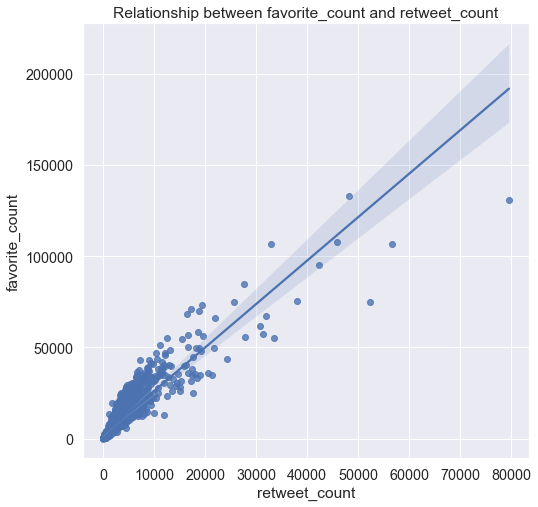

In [64]:
plt.figure(figsize=(8,8))
sns.regplot(x = df['retweet_count'], y = df['favorite_count']).set_title("Relationship between favorite_count and retweet_count");

#### 3. Twitter source most used by #WeRateDogs followers

In [65]:
ind = df['source'].value_counts().index

In [66]:
df['source'].value_counts()[ind]

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

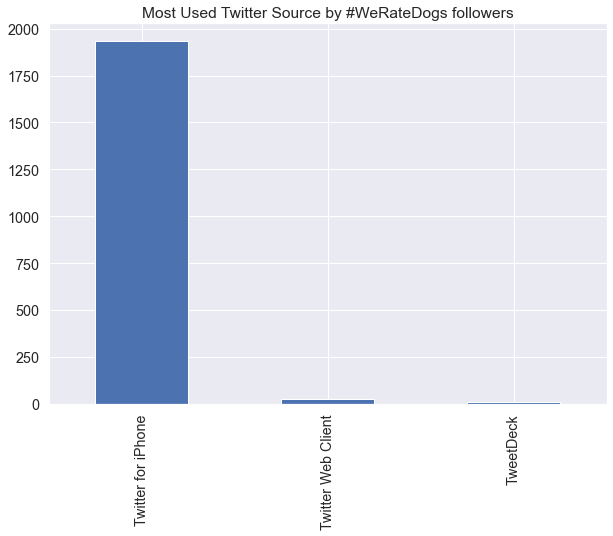

In [67]:
df['source'].value_counts()[ind].plot(kind='bar',
                                      title='Most Used Twitter Source by #WeRateDogs followers',
                                     figsize = (10,7));

**Insight:**
- Most followers of #WeRateDogs are tweeting from an iphone.

### THE END OF PROJECT !!!